In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

In [2]:
#load audio file
sampling_freq, signal = wavfile.read("random_sound.wav")

<br><hr><br>

## 0) Checking Audio data

In [3]:
#parameters
print("\nSignal shape:", signal.shape)
print("Sampling_freq:", sampling_freq)
print("Datatype:", signal.dtype)
print("Signal duration:", round(signal.shape[0]/float(sampling_freq), 2), "seconds")


Signal shape: (132300,)
Sampling_freq: 44100
Datatype: int16
Signal duration: 3.0 seconds


In [7]:
signal

array([ -3893, -18346, -10040, ...,  20294,  30307,   9682], dtype=int16)

<br><hr><br>

## 1) Visualizing Audio signal

In [8]:
#regularization signal
signal = signal / np.power(2, 15)

In [24]:
# head(signal, 50)
signal = signal[:50]

In [25]:
#time-axis with 1/1000 second tick (= millisecond)
time_axis = 1000 * np.arange(0, len(signal), 1)  / float(sampling_freq)

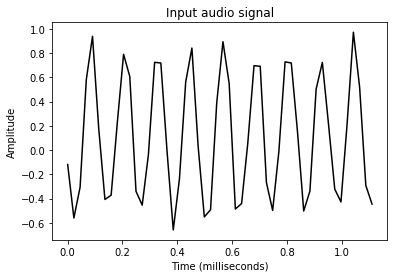

In [26]:
plt.plot(time_axis, signal, color="black")
plt.xlabel("Time (milliseconds)")
plt.ylabel("Amplitude")
plt.title("Input audio signal")
plt.show()

<br><hr><br>

In [3]:
#load audio data
sampling_freq, signal = wavfile.read("spoken_word.wav")

#regularizing audio signal
signal = signal / np.power(2, 15)

#extracting signal length
len_signal = len(signal)
len_half = np.ceil((len_signal+1)/2.0).astype(np.int)

In [4]:
#Fourier transformation
freq_signal = np.fft.fft(signal)

#regularization
freq_signal = abs(freq_signal[0:len_half]) / len_signal
freq_signal **= 2

In [5]:
len_fts = len(freq_signal)

#짝수/홀수에 따라 신호값 조정
if len_signal %2 :
    freq_signal[1:len_fts] *= 2
else : 
    freq_siganl[1:len_fts-1] *= 2

In [6]:
#decibel 단위의 신호 크기 추출
signal_power = 10 * np.log10(freq_signal)
x_axis = np.arange(0, len_half, 1) * (sampling_freq / len_signal) / 1000.0

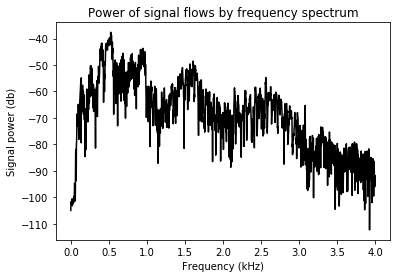

In [10]:
plt.figure()
plt.plot(x_axis, signal_power, color="black")
plt.xlabel("Frequency (kHz)")
plt.ylabel("Signal power (db)")
plt.title("Power of signal flows by frequency spectrum")
plt.show()

<br><hr><br>

## 2) Creating Audio signal

In [19]:
from scipy.io.wavfile import write

In [11]:
output_file = "generated_audio.wav"

In [12]:
#parameters of audio to create
duration = 4 #초 단위
sampling_freq = 44100 # Hz 단위
tone_freq = 784
min_val = -4 * np.pi
max_val = 4 * np.pi

In [14]:
#creating audio signal
t = np.linspace(min_val, max_val, duration*sampling_freq)
signal = np.sin(2 * np.pi * tone_freq * t)

In [15]:
#adding noise to signal
noise = 0.5 * np.random.rand(duration * sampling_freq)
signal += noise

In [16]:
#convert to 16bit integer values
scaling_factor = np.power(2,15) - 1
signal_normalized = signal / np.max(np.abs(signal))
signal_scaled = np.int16(signal_normalized * scaling_factor)

In [20]:
#save audio signal to output file
write(output_file, sampling_freq, signal_scaled)

In [22]:
signal = signal[:200]
time_axis = 1000 * np.arange(0, len(signal), 1) / float(sampling_freq)

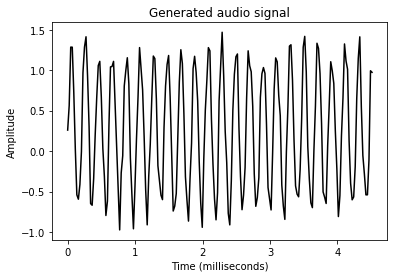

In [23]:
plt.plot(time_axis, signal, color="black")
plt.xlabel("Time (milliseconds)")
plt.ylabel("Amplitude")
plt.title("Generated audio signal")
plt.show()

<br><hr><br>

## 3) Compounding monotone for making music

In [24]:
import json

In [25]:
def tone_synthesizer(freq, duration, amplitude=1.0, sampling_freq=44100) : 
    time_axis = np.linspace(0, duration, duration * sampling_freq)
    signal = amplitude * np.sin(2 * np.pi * freq * time_axis)
    return signal.astype(np.int16)

In [43]:
file_tone_single = "generated_tone_single.wav"
file_tone_sequence = "generated_tone_sequence.wav"

mapping_file = "tone_mapping.json"

In [27]:
#주파수-음색 매핑 파일로드
with open(mapping_file, 'r') as f : 
    tone_map = json.loads(f.read())

In [28]:
#F 음색 생성
tone_name = "F"
duration = 3 
amplitude = 12000 #진폭, Hz 단위
sampling_freq = 44100

In [31]:
tone_freq = tone_map[tone_name]
synthesized_tone = tone_synthesizer(tone_freq, duration, amplitude, sampling_freq)

In [32]:
write(file_tone_single, sampling_freq, synthesized_tone)

In [33]:
tone_sequence = [("G", 0.4), ("D", 0.5), ("F", 0.3), ("C", 0.6), ("A", 0.4)]

In [34]:
#위 시퀀스를 기반으로 오디오 신호를 만든다
signal = np.array([])
for item in tone_sequence : 
    tone_name = item[0]

In [36]:
freq = tone_map[tone_name] #음색별로 주파수 추출
duration = item[1] #지속시간 추출

In [39]:
syntehsized_tone = tone_synthesizer(freq, duration, amplitude, sampling_freq)
signal = np.append(signal, synthesized_tone, axis=0)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


In [44]:
write(file_tone_sequence, sampling_freq, signal)

<br><hr><br>

## 4) Extracting Voice feature

In [46]:
from features import mfcc, logfbank

In [57]:
sampling_freq, signal = wavfile.read("random_sound.wav")

In [59]:
signal = signal[:10000]

In [61]:
#MFCC 특징 추출
features_mfcc = mfcc(signal, sampling_freq)
#MFCC 매개변수 출력
print("\nMFCC:\nNumber of windows =", features_mfcc.shape[0])
print("Length of each feature =", features_mfcc.shape[1])

TypeError: 'float' object cannot be interpreted as an integer

In [ ]:
features_mfcc = features_mfcc.T
plt.matshow(features_mfcc)
plt.title("MFCC")

In [ ]:
#필터뱅크 특징 추출
features_fb = logfbank(signal, sampling_freq)

In [ ]:
#필터뱅크 매개변수 출력
print("\nFilter bank:\nNumber of windows =", features_fb.shape[0])
print("Length of each features =", features_fb.shape[1])

In [ ]:
features_fb = features_fb.T
plt.matshow(features_fb)
plt.title("Filter bank")
plt.show()